In [65]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

In [163]:
d = 2

size = 100
r = np.random.normal(size=size)
x = np.array(range(size))
r *= 10
r += x
r2 = np.random.normal(size=size)
x = np.array(range(size))
r2 *= 10
r2 -= x[::-1]
r = np.array(r)
r2 = np.array(r2)

y = np.array([r2,x])
x = np.array([r,x])
print(x.shape)
print(y.shape)

(2, 100)
(2, 100)


In [164]:
a = cvx.Variable(d)
b = cvx.Variable()

obj = cvx.Minimize(cvx.norm(a,2)/2)

x_constraints = [a.T * y.T[i] - b >=  1  for i in range(m)]
y_constraints = [a.T * x.T[i] - b <= -1 for i in range(n)]

constraints = x_constraints + y_constraints

prob = cvx.Problem(obj, constraints)

prob.solve()
print("Problem Status: %s"%prob.status)

Problem Status: optimal


In [165]:
a = a.value
b = b.value

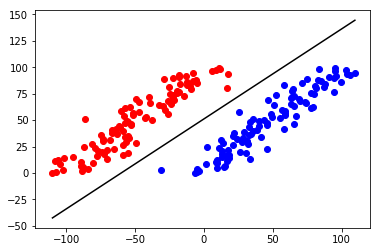

In [166]:
plt.scatter(x.T[:,0],x.T[:,1],color='blue')
plt.scatter(y.T[:,0],y.T[:,1],color='red')

d1_min = np.min([x.T[:,0],y.T[:,0]])
d1_max = np.max([x.T[:,0],y.T[:,0]])
# Line form: (-a[0] * x - b ) / a[1]
d2_atD1min = (-a[0]*d1_min + b ) / a[1]
d2_atD1max = (-a[0]*d1_max + b ) / a[1]

plt.plot([d1_min,d1_max],[d2_atD1min,d2_atD1max],color='black')


In [167]:
import quadprog as qp

In [174]:
z = np.ones(200)
z[100:] = -1*z[100:]
D = np.diag(z)

In [170]:
temp = np.ones([200,2])
temp[:100] = x.T
temp[100:] = y.T

In [224]:
G = -D@temp@temp.T@D

In [225]:
temp2 = np.ones(200).T@D

In [226]:
c = np.zeros([201,200])
c[1:201] = np.identity(200)
c[0] = temp2
b = 0.5*np.ones(201)
b[0] = 0

In [246]:
G = G+830000*np.identity(200)

In [247]:
res = quadprog.solve_qp(G = G , a = np.ones(200), C = c.T ,b=b,meq = 1)

In [248]:
print(res)

(array([0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5   

In [243]:
x = cvx.Variable(200)

obj = cvx.Maximize(f(x))#-cvx.dot(cvx.dot(x.T,G),x)/2 +cvx.dot(np.ones(200)),x)
prob = cvx.Problem(obj)
prob.solve()


DCPError: Problem does not follow DCP rules. However, the problem does follow DGP rules. Consider calling this function with `gp=True`.